In [1]:
import os 
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
df = pd.read_csv('ordhek_dataset.csv')

C:\Users\iftek\AppData\Local\Temp\ipykernel_3060\653253859.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ordhek_dataset.csv')


In [9]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0.0,0.0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
60913,a31b68a32f5bc20f,And I reverted. Genetic evidence neither confi...,0.0,0.0,0.0,0.0,0.0,0.0
60914,a31c341d17d2babf,"one of us, one of us... gooble ggggchkkk ∴ here…♠",0.0,0.0,0.0,0.0,0.0,0.0
60915,a31dc31643ba2a83,I say merge them. Wiki really has too many spl...,0.0,0.0,0.0,0.0,0.0,0.0
60916,a31dd1bf929cf7c0,SW: as I was going to ask Masem to close the R...,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
60913,a31b68a32f5bc20f,And I reverted. Genetic evidence neither confi...,0.0,0.0,0.0,0.0,0.0,0.0
60914,a31c341d17d2babf,"one of us, one of us... gooble ggggchkkk ∴ here…♠",0.0,0.0,0.0,0.0,0.0,0.0
60915,a31dc31643ba2a83,I say merge them. Wiki really has too many spl...,0.0,0.0,0.0,0.0,0.0,0.0
60916,a31dd1bf929cf7c0,SW: as I was going to ask Masem to close the R...,0.0,0.0,0.0,0.0,0.0,0.0
60917,a31e737fdbb0e279,"""::::::::In the thread """"Real world dispute"""" ...",0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df.groupby('toxic').size() 

toxic
0.0    55013
1.0     5904
dtype: int64

In [16]:
df.count(axis = 1)

0        8
1        8
2        8
3        8
4        8
        ..
60913    8
60914    8
60915    8
60916    8
60917    8
Length: 60917, dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
len(df)

60917

In [10]:
from tensorflow.keras.layers import TextVectorization

In [14]:
X = df[df.columns[2:]].values
y = df['comment_text']

In [15]:
MAX_FEATURES = 200000 #NUMBER OF WORDS IN THE VOCAB

In [17]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [18]:
vectorizer.adapt(y.values)

In [19]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'are',
 'have',
 'your',
 'with',
 'if',
 'was',
 'article',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'will',
 'has',
 'talk',
 'please',
 'no',
 'would',
 'its',
 'one',
 'like',
 'just',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'we',
 'more',
 'other',
 'see',
 'some',
 'who',
 'here',
 'his',
 'also',
 'because',
 'think',
 'im',
 'know',
 'how',
 'why',
 'am',
 'edit',
 'only',
 'articles',
 'people',
 'out',
 'up',
 'were',
 'use',
 'then',
 'when',
 'may',
 'time',
 'did',
 'them',
 'their',
 'now',
 'being',
 'thanks',
 'than',
 'get',
 'even',
 'make',
 'good',
 'information',
 'had',
 'does',
 'very',
 'well',
 'could',
 'want',
 'sources',
 'such',
 'way',
 'first',
 'these',
 'deletion',
 'pages',
 'name',
 'new',

In [21]:
vectorizer("Hello world,how are you?")[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([294,   1,  19,   7,   0], dtype=int64)>

In [22]:
vectorized_text = vectorizer(y.values)

In [23]:
vectorized_text

<tf.Tensor: shape=(60917, 1800), dtype=int64, numpy=
array([[   665,     74,      2, ...,      0,      0,      0],
       [116355,     54,   2386, ...,      0,      0,      0],
       [   495,    430,     71, ...,      0,      0,      0],
       ...,
       [     8,    120,   1086, ...,      0,      0,      0],
       [ 17588,     18,      8, ...,      0,      0,      0],
       [    11,      2,   1610, ...,      0,      0,      0]], dtype=int64)>

In [52]:
#MCSHBAP = map,cache,shuffle,batch,prefetch
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text,X))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) #helps prevent bottlenecks

In [53]:
batch_x, batch_y = dataset.as_numpy_iterator().next()

In [54]:
train = dataset.take(int(len(dataset)*.4))
val = dataset.skip(int(len(dataset)*.4)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.1))

In [55]:
int(len(dataset))

3808

In [56]:
train_generator = train.as_numpy_iterator()

In [57]:
train_generator.next()

(array([[  167,    92,    30, ...,     0,     0,     0],
        [  257,   111,     4, ...,     0,     0,     0],
        [  433,    84,  5515, ...,     0,     0,     0],
        ...,
        [  233,    81,    21, ...,     0,     0,     0],
        [15051,     6,   522, ...,     0,     0,     0],
        [  454,     4, 50581, ...,     0,     0,     0]], dtype=int64),
 array([[1., 0., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]))

In [58]:
from tensorflow.keras.models import Sequential

In [59]:
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [60]:
model = Sequential()

model.add(Embedding(MAX_FEATURES+1,32))
model.add(Bidirectional(LSTM(32,activation='tanh')))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))


model.add(Dense(6,activation='sigmoid'))

In [61]:
model.compile(loss='BinaryCrossentropy',optimizer = 'Adam')

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          6400032   
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dense_7 (Dense)             (None, 6)                 1542      
                                                      

In [64]:
history = model.fit(train,epochs=1,validation_data=val)

1523/1523 [==============================] - 1477s 970ms/step - loss: 0.0648 - val_loss: 0.0498


In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 1000x600 with 0 Axes>

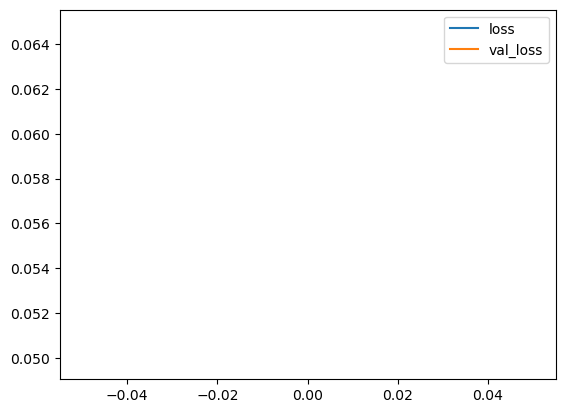

In [66]:
plt.figure(figsize=(10,6))
pd.DataFrame(history.history).plot()
plt.show()

In [68]:
text = vectorizer('You freakin suck!')

In [69]:
text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([    7, 11615,   440, ...,     0,     0,     0], dtype=int64)>

In [70]:
res = model.predict(np.expand_dims(text,0))

1/1 [==============================] - 1s 1s/step


In [71]:
res

array([[0.9830661 , 0.13238667, 0.86037266, 0.02978721, 0.67865926,
        0.10813471]], dtype=float32)

In [73]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [74]:
batch_X,batch_y = test.as_numpy_iterator().next()

In [77]:
(model.predict(batch_X)>0.5).astype(int)

1/1 [==============================] - 0s 151ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [78]:
from tensorflow.keras.metrics import Precision,Recall,CategoricalAccuracy

In [80]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [84]:
for batch in test.as_numpy_iterator():
    X_true,y_true = batch
    yhat = model.predict(X_true)
    
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true,yhat)
    re.update_state(y_true,yhat)
    acc.update_state(y_true,yhat)

1/1 [==============================] - 0s 130ms/step


1/1 [==============================] - 0s 127ms/step


In [88]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision: 0.8301056623458862, Recall:0.6823444366455078,Accuracy:0.41578948497772217


In [106]:
import gradio as gr

In [ ]:
model.save('toxic_model.h5')

In [92]:
#model = tf.keras.models.load_model('toxic_model.h5')

In [94]:
input_str = vectorizer('Hey I freakin hate you')

In [96]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 0s 145ms/step


In [97]:
res

array([[0.5041212 , 0.00358411, 0.13637017, 0.00558506, 0.13650425,
        0.02150682]], dtype=float32)

In [98]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = " "
    for idx, col in enumerate (df.columns[2:]):
        text += '{}: {}\n'.format(col,results[0][idx]>0.5)
    return text

In [109]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

In [110]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://e4fc7f37f2ee6718b4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 133ms/step
